# Using Pynite FEA Software

In [2]:
from PyNite import FEModel3D

In [3]:
from PyNite.Visualization import render_model

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -1.15e+05 | 1.15e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -8.66e+08 | 8.66e+08 |
|       LC2        |   0    |   0    | -3.25e+05 | 3.25e+05 |   0    |   0    |   0    |    0    |   0    |    0    |  -2.5e+09 | 2.5e+09  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+



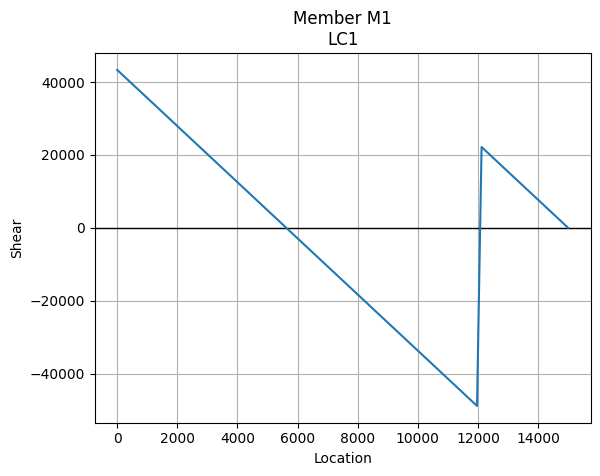

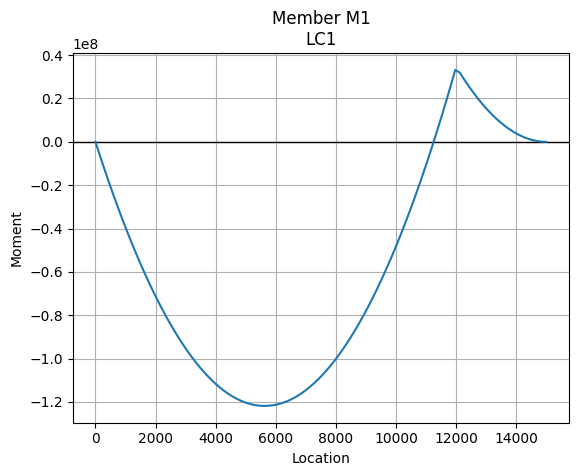

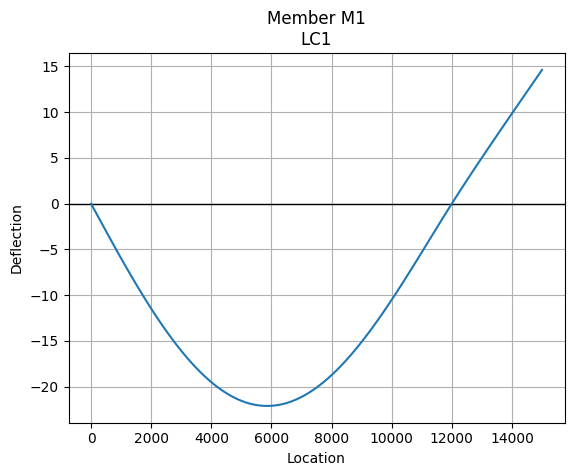

In [23]:
beam_model = FEModel3D() # Creates an empty model

E = 200e3     # Modulus of elasticity (MPa)
G = 77e3      # Shear modulus of elasticity (MPa)
nu = 0.3      # Poisson's ratio
rho = 7.7e-6  # Density (kci)
beam_model.add_material('Steel', E, G, nu, rho)

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model.add_node("node2", 12000, 0, 0)
beam_model.add_node("node3", 15000, 0, 0)

beam_model.add_member(name="M1", i_node="node1", j_node="node3", material="Steel", Iy=20e6, Iz=400e6, J=30e3, A=1500)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node2", False, True, True, False, False, False)

beam_model.add_load_combo(name="LC1", factors={"D": 1.4})
beam_model.add_load_combo("LC2", {"D": 1.25, "L": 1.5})

beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-5.5, w2=-5.5, x1=0, x2=15000, case="D")
beam_model.add_member_dist_load("M1", "Fy", w1=-7.8, w2=-7.8, x1=0, x2=12000, case="L")
beam_model.add_member_dist_load("M1", "Fy", w1=-13.0, w2=-13.0, x1=12000, x2=15000, case="L")

beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=-15000, x=4000, case="L")

beam_model.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model.Members['M1'].plot_shear(Direction="Fy", combo_name="LC1", n_points=100)
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="LC1", n_points=100)
beam_model.Members['M1'].plot_deflection(Direction="dy", combo_name="LC1", n_points=100)


#render_model(beam_model, combo_name='LC2', annotation_size=500)
#render_model(beam_model, deformed_shape=True, combo_name="LC1", annotation_size=300)

In [10]:
beam_model.Nodes['node3'].DY
print(beam_model.Nodes['node3'].DY)

{'LC1': 14.617968750000005, 'LC2': 35.01128906250002}
